In [1]:
from ldaa import *
import matplotlib.pyplot as plt
import heapq
from generator import * 

In [2]:
generator1 = generator(10,500,np.ones(10),20)
generator2 = generator(10,500,np.ones(10),20)


In [3]:
generator2.make_parameter()

array([[1.28205648e-02, 8.10432651e-03, 7.74849072e-03, ...,
        6.83893433e-04, 9.86218399e-04, 4.37972823e-05],
       [7.37056862e-04, 1.28295789e-03, 1.78837341e-04, ...,
        9.16247394e-04, 8.34894796e-04, 5.89343330e-04],
       [1.22026727e-04, 1.21760786e-03, 1.55075676e-03, ...,
        6.03180179e-04, 1.35058942e-04, 6.07852738e-04],
       ...,
       [5.26253067e-04, 5.32269240e-03, 1.25346289e-04, ...,
        2.57135086e-04, 6.42524383e-04, 2.64527076e-03],
       [1.93765590e-04, 8.62631080e-04, 1.00402519e-04, ...,
        9.44372719e-04, 1.09142051e-03, 2.43872905e-03],
       [2.78618868e-03, 3.49560142e-05, 1.03701331e-04, ...,
        1.22296936e-02, 7.71075068e-03, 1.05265029e-02]])

In [4]:
docs1 = generator1.sample(m=50)

In [5]:
model = LDA(10,500)

In [6]:
phi_post1,gamma_post1,alpha_post1,beta_post1 = model.fit(docs1)

step 0
finished E
finished M
step 1
finished E
finished M
step 2
finished E
finished M
step 3
finished E
finished M
step 4
finished E
finished M
step 5
finished E
finished M
step 6
finished E
finished M
step 7
finished E
finished M
step 8
finished E
finished M
step 9
finished E
finished M
step 10
finished E
finished M
step 11
finished E
finished M
step 12
finished E
finished M
step 13
finished E
finished M
step 14
finished E
finished M
step 15
finished E
finished M
step 16
finished E
finished M
step 17
finished E
finished M
step 18
finished E
finished M
step 19
finished E
finished M
step 20
finished E
finished M
step 21
finished E
finished M
step 22
finished E
finished M
step 23
finished E
finished M
step 24
finished E
finished M
step 25
finished E
finished M
step 26
finished E
finished M
step 27
finished E
finished M
step 28
finished E
finished M
step 29
finished E
finished M
step 30
finished E
finished M
step 31
finished E
finished M
step 32
finished E
finished M
step 33
finished E
f

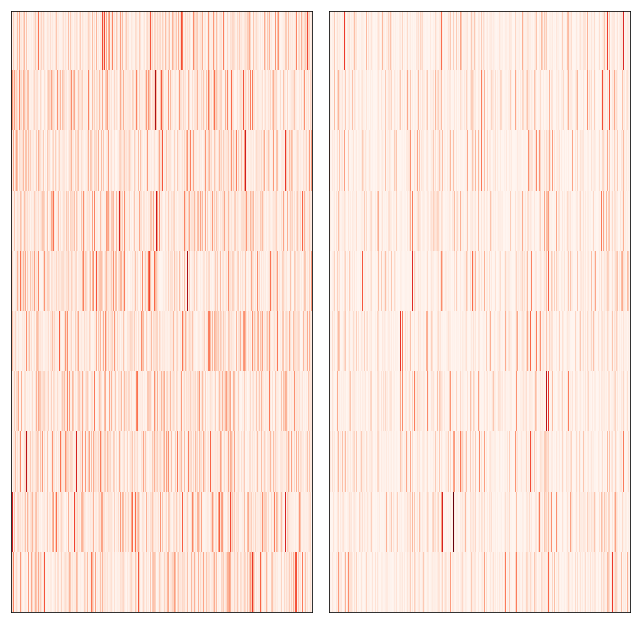

In [7]:
B1 = np.repeat(generator1.beta, 100, axis=0)
B2 = np.repeat(beta_post1, 100, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()


In [16]:
docs2 = generator2.sample(m=50)

In [17]:
model2 = LDA(10,500)

In [18]:
phi_post2,gamma_post2,alpha_post2,beta_post2 = model2.fit(docs2,max_iter=300)

step 0
finished E
finished M
step 1
finished E
finished M
step 2
finished E
finished M
step 3
finished E
finished M
step 4
finished E
finished M
step 5
finished E
finished M
step 6
finished E
finished M
step 7
finished E
finished M
step 8
finished E
finished M
step 9
finished E
finished M
step 10
finished E
finished M
step 11
finished E
finished M
step 12
finished E
finished M
step 13
finished E
finished M
step 14
finished E
finished M
step 15
finished E
finished M
step 16
finished E
finished M
step 17
finished E
finished M
step 18
finished E
finished M
step 19
finished E
finished M
step 20
finished E
finished M
step 21
finished E
finished M
step 22
finished E
finished M
step 23
finished E
finished M
step 24
finished E
finished M
step 25
finished E
finished M
step 26
finished E
finished M
step 27
finished E
finished M
step 28
finished E
finished M
step 29
finished E
finished M
step 30
finished E
finished M
step 31
finished E
finished M
step 32
finished E
finished M
step 33
finished E
f

finished E
finished M
step 269
finished E
finished M
step 270
finished E
finished M
step 271
finished E
finished M
step 272
finished E
finished M
step 273
finished E
finished M
step 274
finished E
finished M
step 275
finished E
finished M
step 276
finished E
finished M
step 277
finished E
finished M
step 278
finished E
finished M
step 279
finished E
finished M
step 280
finished E
finished M
step 281
finished E
finished M
step 282
finished E
finished M
step 283
finished E
finished M
step 284
finished E
finished M
step 285
finished E
finished M
step 286
finished E
finished M
step 287
finished E
finished M
step 288
finished E
finished M
step 289
finished E
finished M
step 290
finished E
finished M
step 291
finished E
finished M
step 292
finished E
finished M
step 293
finished E
finished M
step 294
finished E
finished M
step 295
finished E
finished M
step 296
finished E
finished M
step 297
finished E
finished M
step 298
finished E
finished M
step 299
finished E
finished M


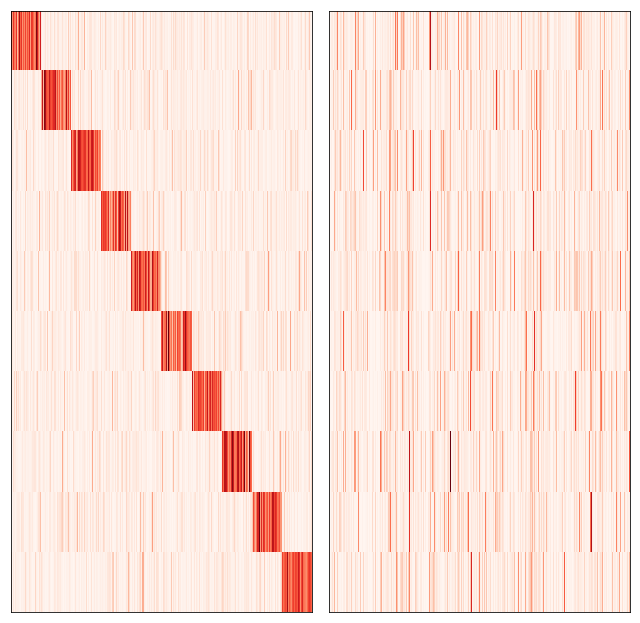

In [19]:
B1 = np.repeat(generator2.beta, 100, axis=0)
B2 = np.repeat(beta_post2, 100, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()